In [3]:
import pandas as pd
import os

# Получаем текущую рабочую директорию
current_dir = os.getcwd()
file_path = os.path.join(current_dir, "Лист Microsoft Excel.xlsx")

excel_data = pd.ExcelFile(file_path)

# Просмотр имен листов в Excel-файле
sheet_names = excel_data.sheet_names
sheet_names

['Лист1']

In [4]:
# Загрузка данных с первого листа
df = excel_data.parse('Лист1')

# Просмотр первых строк таблицы для анализа структуры
df.head()

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,1411,F
2,b,Ux_filter
3,"t, seconds",01_02_0139
4,0.000709,112.167


In [5]:
# Очистка и выбор данных, начиная с пятой строки, где начинаются числовые значения
df_cleaned = df.iloc[4:].copy()
df_cleaned.columns = ['time', 'value']
df_cleaned = df_cleaned.dropna().astype(float)

# Проверим, как выглядят очищенные данные
df_cleaned.head()

,time,value
4,0.000709,112.167
5,0.001417,129.033
6,0.002126,92.579
7,0.002835,107.788
8,0.003544,128.961


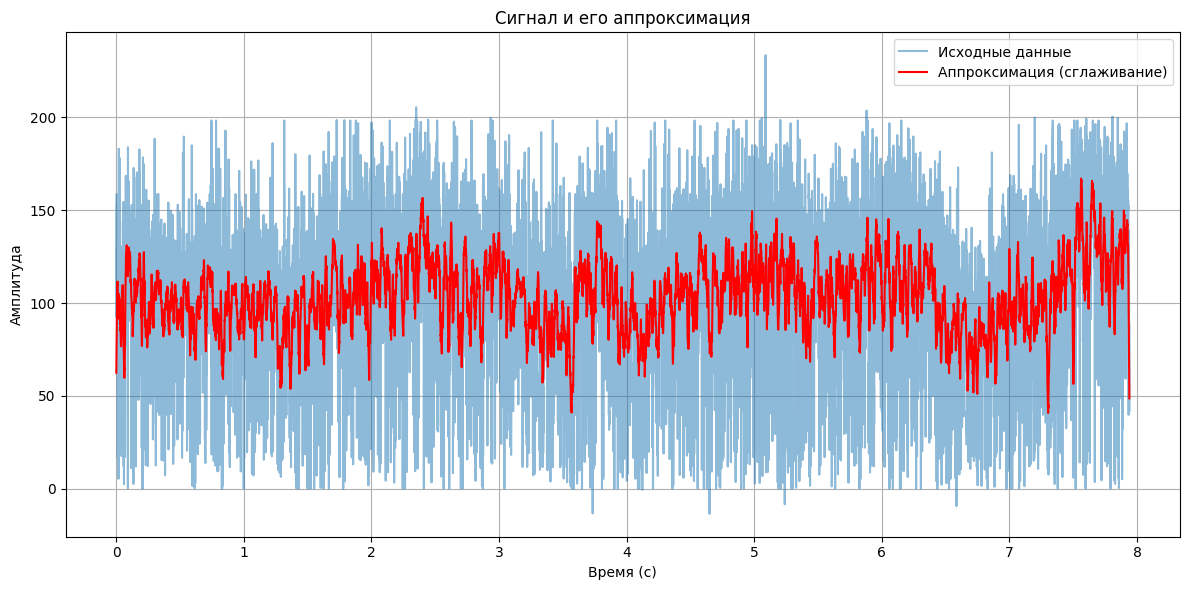

(63.12588095238095, 0.0037545218509947233)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

# Извлечение данных
time = df_cleaned['time'].values
values = df_cleaned['value'].values

# Аппроксимация методом скользящего среднего
window_size = 21  # Размер окна для сглаживания
smoothed = np.convolve(values, np.ones(window_size)/window_size, mode='same')

# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(time, values, label='Исходные данные', alpha=0.5)
plt.plot(time, smoothed, label='Аппроксимация (сглаживание)', color='red')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сигнал и его аппроксимация')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Поиск пиков на аппроксимированной кривой
peaks, _ = find_peaks(smoothed)
peak_times = time[peaks]
peak_values = smoothed[peaks]

# Расчет амплитуды и периода
amplitude = (np.max(peak_values) - np.min(smoothed)) / 2
periods = np.diff(peak_times)
average_period = np.mean(periods) if len(periods) > 0 else None

amplitude, average_period
